<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Intro" data-toc-modified-id="Intro-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#General-approach" data-toc-modified-id="General-approach-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General approach</a></span></li></ul></li><li><span><a href="#Seaborn" data-toc-modified-id="Seaborn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seaborn</a></span><ul class="toc-item"><li><span><a href="#Plotting-univariate-distributions" data-toc-modified-id="Plotting-univariate-distributions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plotting univariate distributions</a></span></li><li><span><a href="#Plotting-bivariate-distributions" data-toc-modified-id="Plotting-bivariate-distributions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plotting bivariate distributions</a></span></li></ul></li><li><span><a href="#Facetgrid" data-toc-modified-id="Facetgrid-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Facetgrid</a></span></li><li><span><a href="#Plotly" data-toc-modified-id="Plotly-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotly</a></span></li></ul></div>

# Load Data

In [6]:
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
assert matplotlib.__version__ 
"""== "3.1.0",
Please install matplotlib version 3.1.0 by running:
1) !pip uninstall matplotlib 
2) !pip install matplotlib==3.1.0
"""

%matplotlib inline

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

In [8]:
data = pd.read_csv('combined_set.csv')

In [9]:
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
).fillna('Lowest')

In [10]:
print(f'total number of missings vals: {data.isnull().sum().sum()} out of {data.shape[0] * data.shape[1]}')

total number of missings vals: 228 out of 36024


- **Life Ladder**  respondents measure of  the value their lives today on a 0 to 10 scale (10 best) based on Cantril ladder
- **Log GDP per capita** GDP per capita is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018 
- **Social support** Answer to question: “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” 
- **Healthy life expectancy at birth** life expectancy at birth are constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. To match this report’s sample period, interpolation and extrapolation are used.
- **Freedom to make life choices** Answer to question:  “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” 
- **Generosity** Responses to “Have you donated money to a charity in the past month?” compared to GDP per capita
- **Perceptions of corruption** Answer to “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?”
- **Positive affect** comprises the average frequency of happiness, laughter and enjoyment on the previous day.
- **Negative affect** comprises the average frequency of worry, sadness and anger on the previous day. 
- **Confidence in national government** self explanatory
- **Democratic Quality** how democratic is a country
- **Delivery Quality** How well a country delivers on 
- **Gapminder Life Expectancy** Life expectancy from Gapminder
- **Gapminder Population** Population of country

# Intro

I started learning Python more seriously about two years ago. Since then rarely a week has passed where I did not marvel at the simplicity and ease of use of Python itself or one of the many amazing open source libraries in the ecosystem. The more commands, patterns and concepts I become familiar with, the more everything just makes sense.

The opposit holds true for plotting with Python. Initially almost every chart I created looked like a crime escaped from the eighties. What makes matters worse is that to create said abonominations most of the time I had to spend hours on Stackoverflow researching nitty-gritty commands to change the slant of the x-ticks or something similiar silly. Don't even get me started on multi charts. While the results often looks fairly impressive and it is wonderful to create those charts programatically (e.g. 50 in a row), it is just so much work.

For a brief glimps in time I thought Bokeh >Link< would become my goto solution. I came accross Bokeh when I was working on geospartial visualizations. However, I quickly realized that Bokeh, while different, was just as stupidly complicated as matplotlib.

I did try out plot.ly a while ago while, again, working on visualization of geospartial data. Back that it seemed even more stupid than the afforementioned libraries. You needed an account and everything was rendered online and you would then download it. I quickly discarded plot.ly.

Ultimately I settled on using Pandas native plotting for quick inspections and Seaborn for charts for reports and presentations (where visuals matter). However, recently I watched a Youtube video about plotly express, where most importantly they got rid of all this online nonsese. I played around with it and must say, this might actually change my plotting life for the better.

In the following article, I will talk about:
- my general approach to visual data exploration on a conceptual level
- basic plotting with pandas
- advanced plotting with Seaborn
- creating beautiful advanced plots with plotly

## General approach

I tought statistics (Stats 119) whilst studying at Universtity in San Diego. Stats 119 is an into class to statistics. The curiculum included statistical fundamentals like data aggregation (visual and quantitative), concepts of odds and probabilities, regression, sampling, and - to me the most important one - distributions. This was the time my understanding of quantities and phenomena almost entirely shifted to a representation through distributions (most of the time Guassian).

To this day I find it astonishing how far the two quantities mean and standard deviation can get you in really grasping a distribution, the meaning and its implications.

By knowing these two numbers it is straightforward to conclude how likely a certain outcome is, one immediately knows, where the bulk of the results are going to be. It gives you a framework of reference to distinguise anecodatal events from statistically significant ones.

<AxesSubplot:ylabel='Frequency'>

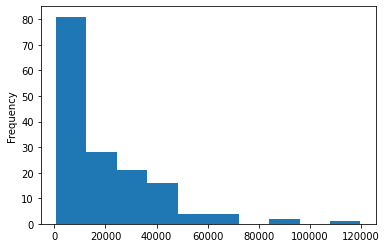

In [11]:
np.exp(data[data['Year']==2018]['Log GDP per capita']).plot(
    kind='hist'
)

<AxesSubplot:title={'center':'Number of countries (y-axis) with certain nubmer of observations (x-axis)'}, ylabel='Frequency'>

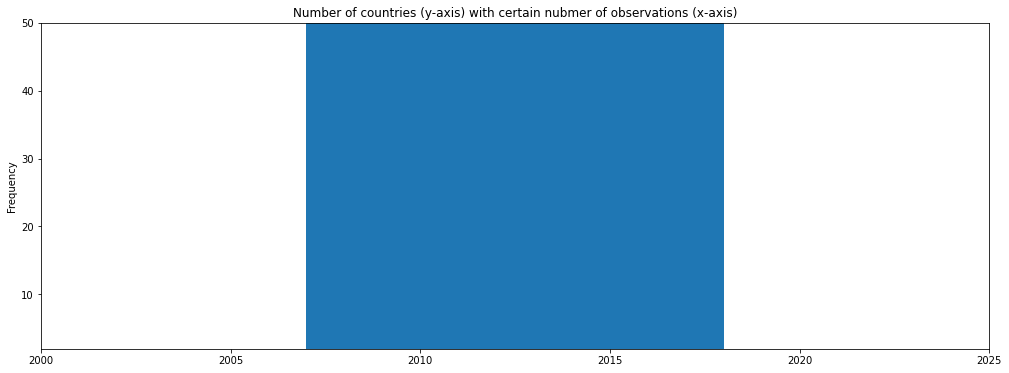

In [12]:
data['Year'].plot(
    kind='hist',
    figsize=(17,6),
    title='Number of countries (y-axis) with certain nubmer of observations (x-axis)',
    xlim=(2000,2025), # makes no sense
    ylim=(2,50), # makes no sense
)

<AxesSubplot:ylabel='Frequency'>

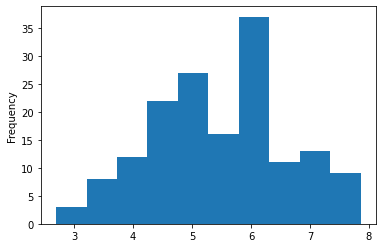

In [13]:
data[data['Year'] == 2018]['Life Ladder'].plot(
    kind='hist'
)

<AxesSubplot:ylabel='Frequency'>

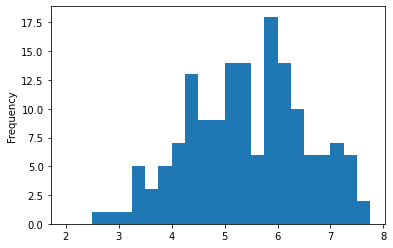

In [14]:
data[data['Year'] == 2018]['Life Ladder'].plot(
    kind='hist',
    bins=np.arange(2,8,0.25)
)

<AxesSubplot:xlabel='Country name'>

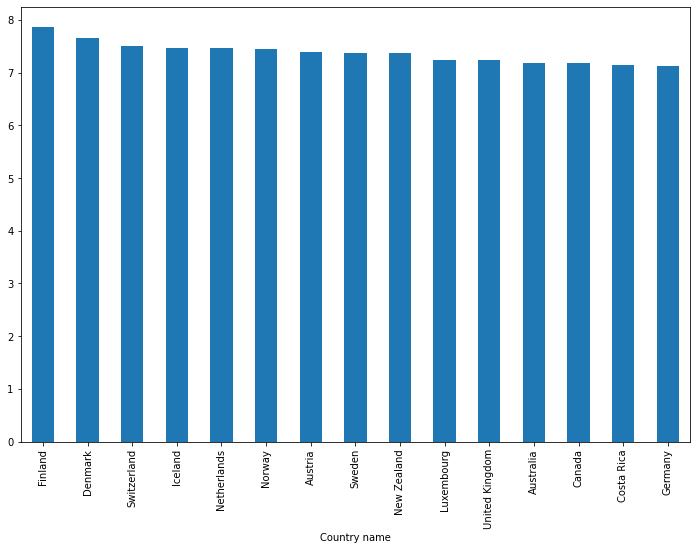

In [15]:
data[
    data['Year'] == 2018
].set_index('Country name')['Life Ladder'].nlargest(15).plot(
    kind='bar',
    figsize=(12,8)
)

<AxesSubplot:ylabel='Continent'>

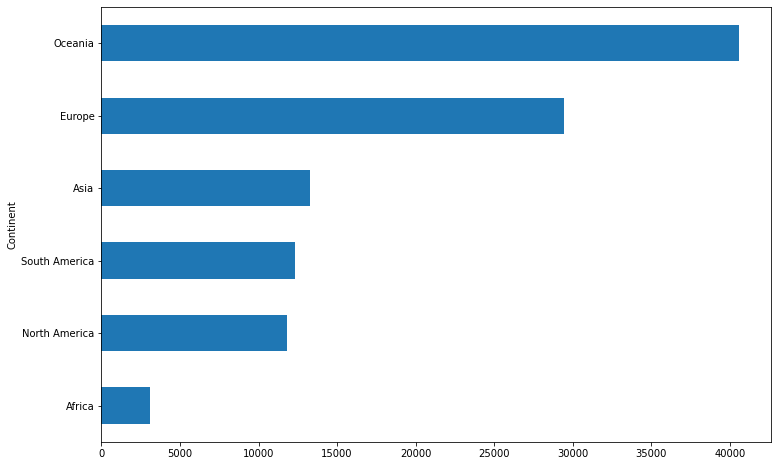

In [16]:
np.exp(data[
    data['Year'] == 2018
].groupby('Continent')['Log GDP per capita']\
       .mean()).sort_values().plot(
    kind='barh',
    figsize=(12,8)
)

<AxesSubplot:>

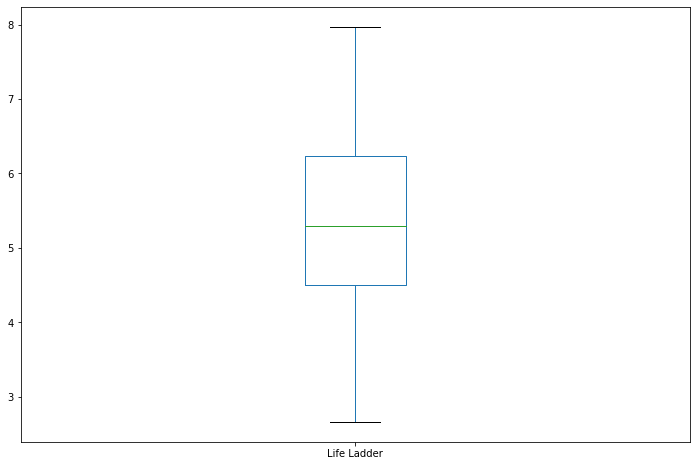

In [17]:
data['Life Ladder'].plot(
    kind='box',
    figsize=(12,8)
)

<AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Gapminder Life Expectancy'>

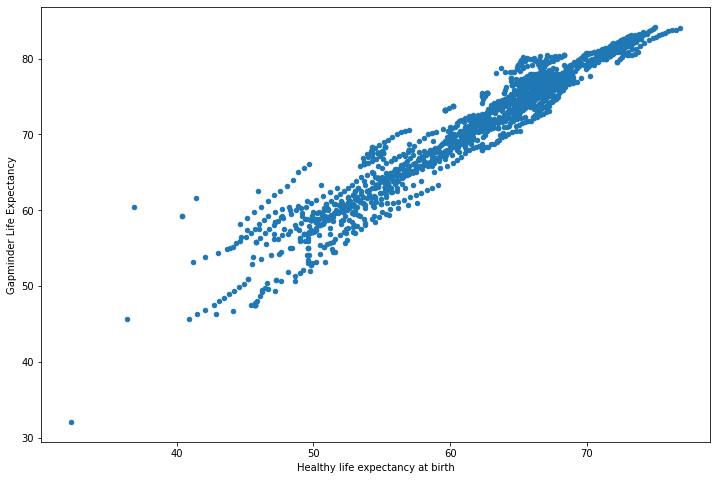

In [18]:
data[['Healthy life expectancy at birth','Gapminder Life Expectancy']].plot(
    kind='scatter',
    x='Healthy life expectancy at birth',
    y='Gapminder Life Expectancy',
    figsize=(12,8)
)

<AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Generosity'>

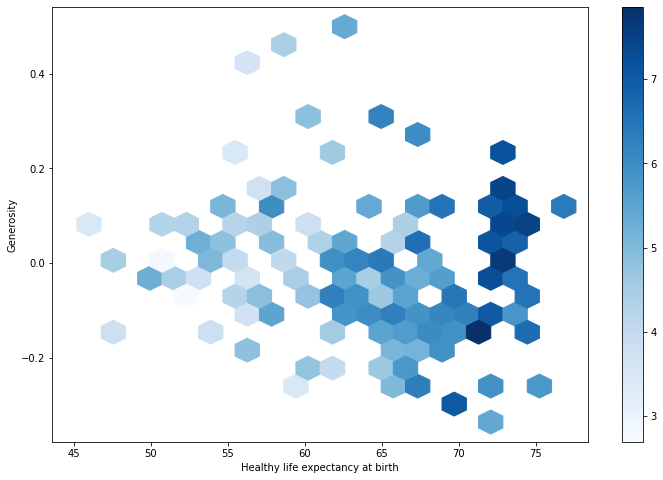

In [19]:
data[data['Year'] == 2018].plot(
    kind='hexbin',
    x='Healthy life expectancy at birth',
    y='Generosity',
    C='Life Ladder',
    gridsize=20,
    figsize=(12,8),
    cmap="Blues", # defaults to greenish
    sharex=False # required to get rid of a bug
)

<AxesSubplot:ylabel='Gapminder Population'>

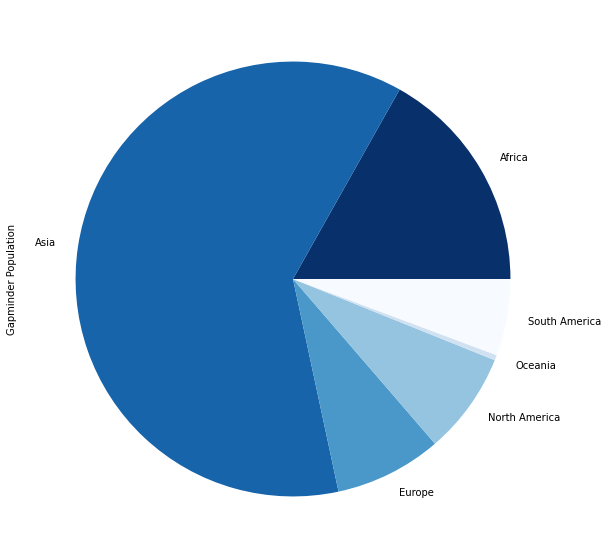

In [20]:
data[data['Year'] == 2018].groupby(
    ['Continent']
)['Gapminder Population'].sum().plot(
    kind='pie',
    figsize=(16,10),
    cmap="Blues_r", # defaults to orange
)

<AxesSubplot:xlabel='Year'>

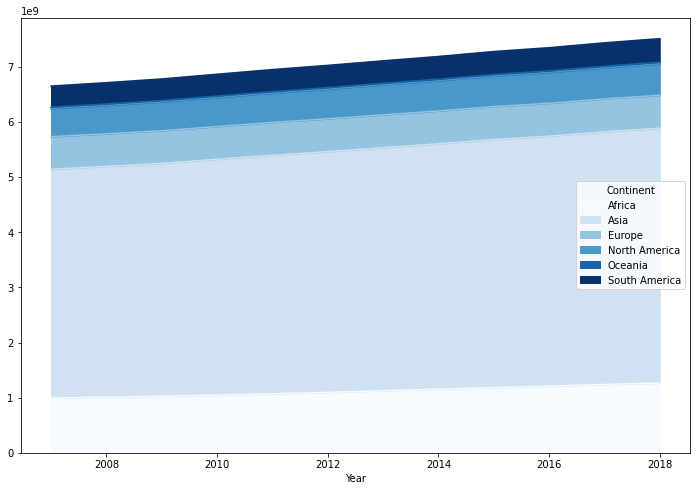

In [21]:
data.groupby(
    ['Year','Continent']
)['Gapminder Population'].sum().unstack().plot(
    kind='area',
    figsize=(12,8),
    cmap="Blues", # defaults to orangish
)

<AxesSubplot:xlabel='Year'>

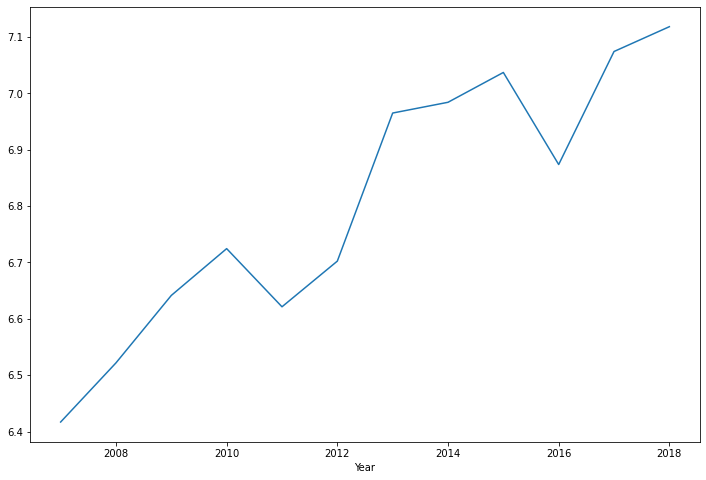

In [22]:
data[
    data['Country name'] == 'Germany'
].set_index('Year')['Life Ladder'].plot(
    kind='line',
    figsize=(12,8)
)

# Seaborn

## Plotting univariate distributions

As mentioned before, I am a big fan of distributions. Histograms and Kernel density alike are potent ways of visualizing a the key features of a particular variable. Let's look at how we generate distributions for 

In [23]:
sns.reset_defaults()

In [24]:
sns.set(
    style="white", 
    palette="muted" # prettier colors
)

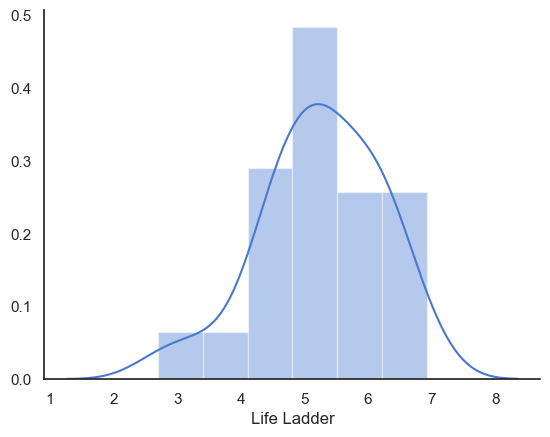

In [25]:
sns_data = data[
    (data['Year'] == 2018) & 
    (data['Continent'] == 'Asia')
]


sns.distplot(
    sns_data['Life Ladder'],
    label='Life Ladder'
)


sns.despine() # pretty graphs

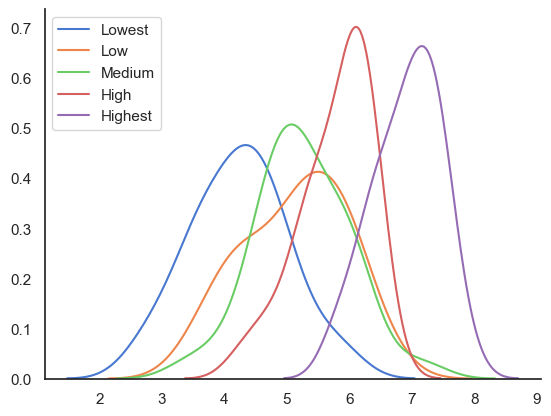

In [26]:
__sns_data = {}
for val in data['Mean Log GDP per capita'].cat.categories:
    __sns_data[val] = data[
        (data['Year'] == 2018) & 
        (data['Mean Log GDP per capita'] == val)
    ]

    sns.kdeplot(
        __sns_data[val]['Life Ladder'], 
        label=val
    )
    
sns.despine()

## Plotting bivariate distributions

Whenever I want to visualy explore the relationship between two or multiple variables it typically comes down to some form of scatterplot and an assessment of joint distributions. There are three variations of a conceptually similar plot, where a in the center graph a form of joint distribution is shown and at the right and top side of the center graph the marginal distributions are depicted.

In [27]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white"
)

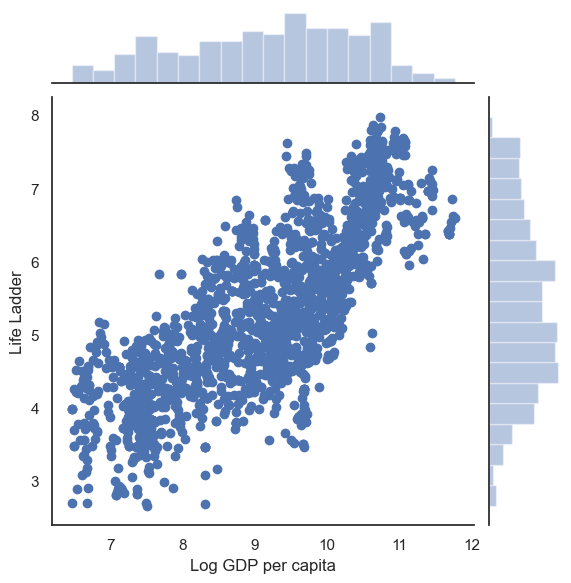

In [28]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='scatter'
)

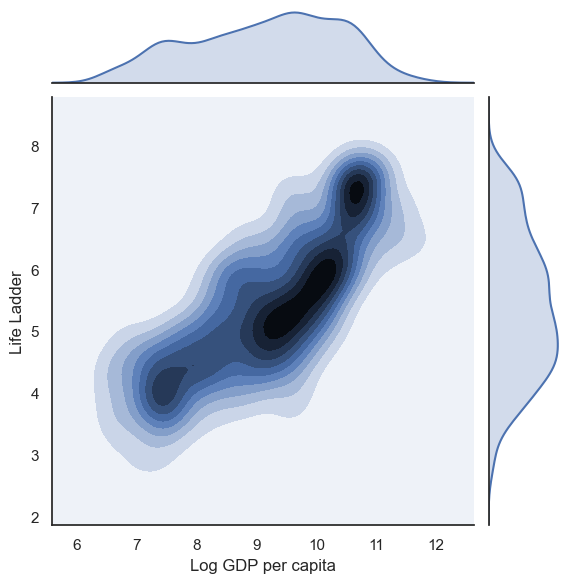

In [29]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='kde'
)

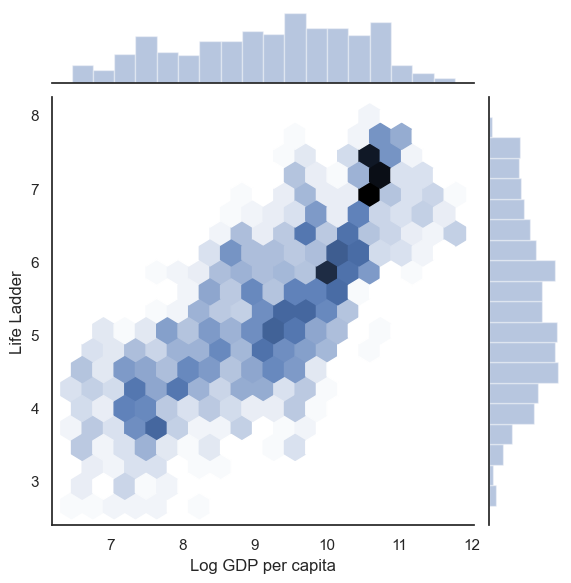

In [30]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='hex'
)

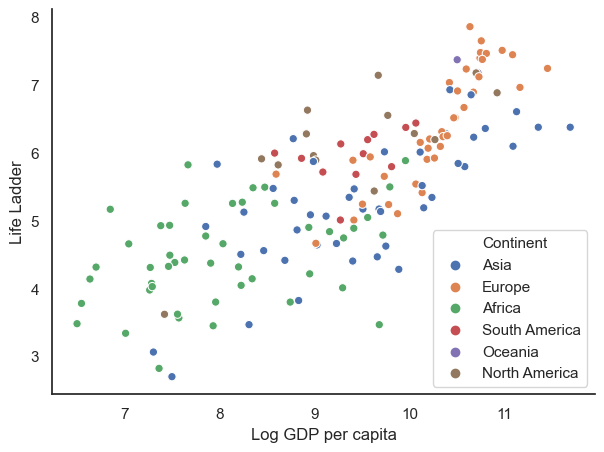

In [31]:
sns.scatterplot(
    x='Log GDP per capita',
    y='Life Ladder',
    hue='Continent',
    data=data[data['Year'] == 2018],
)

sns.despine()

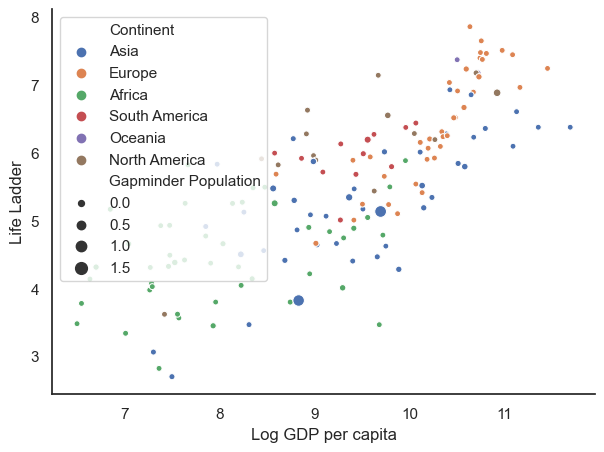

In [32]:
sns.scatterplot(
    x='Log GDP per capita',
    y='Life Ladder',
    hue='Continent',
    data=data[data['Year'] == 2018],
    size='Gapminder Population'
)

sns.despine()

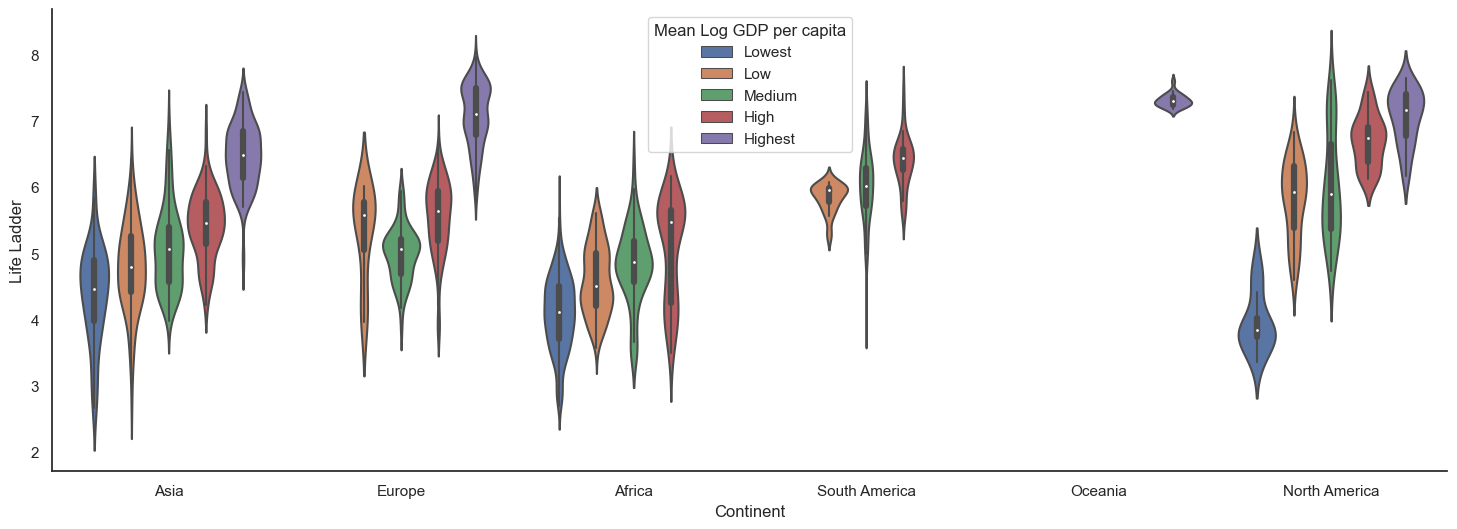

In [33]:
sns.set(
    rc={'figure.figsize':(18,6)}, 
    style="white"
)

sns.violinplot(
    x='Continent',
    y='Life Ladder',
    hue='Mean Log GDP per capita',
    data=data
)

sns.despine()

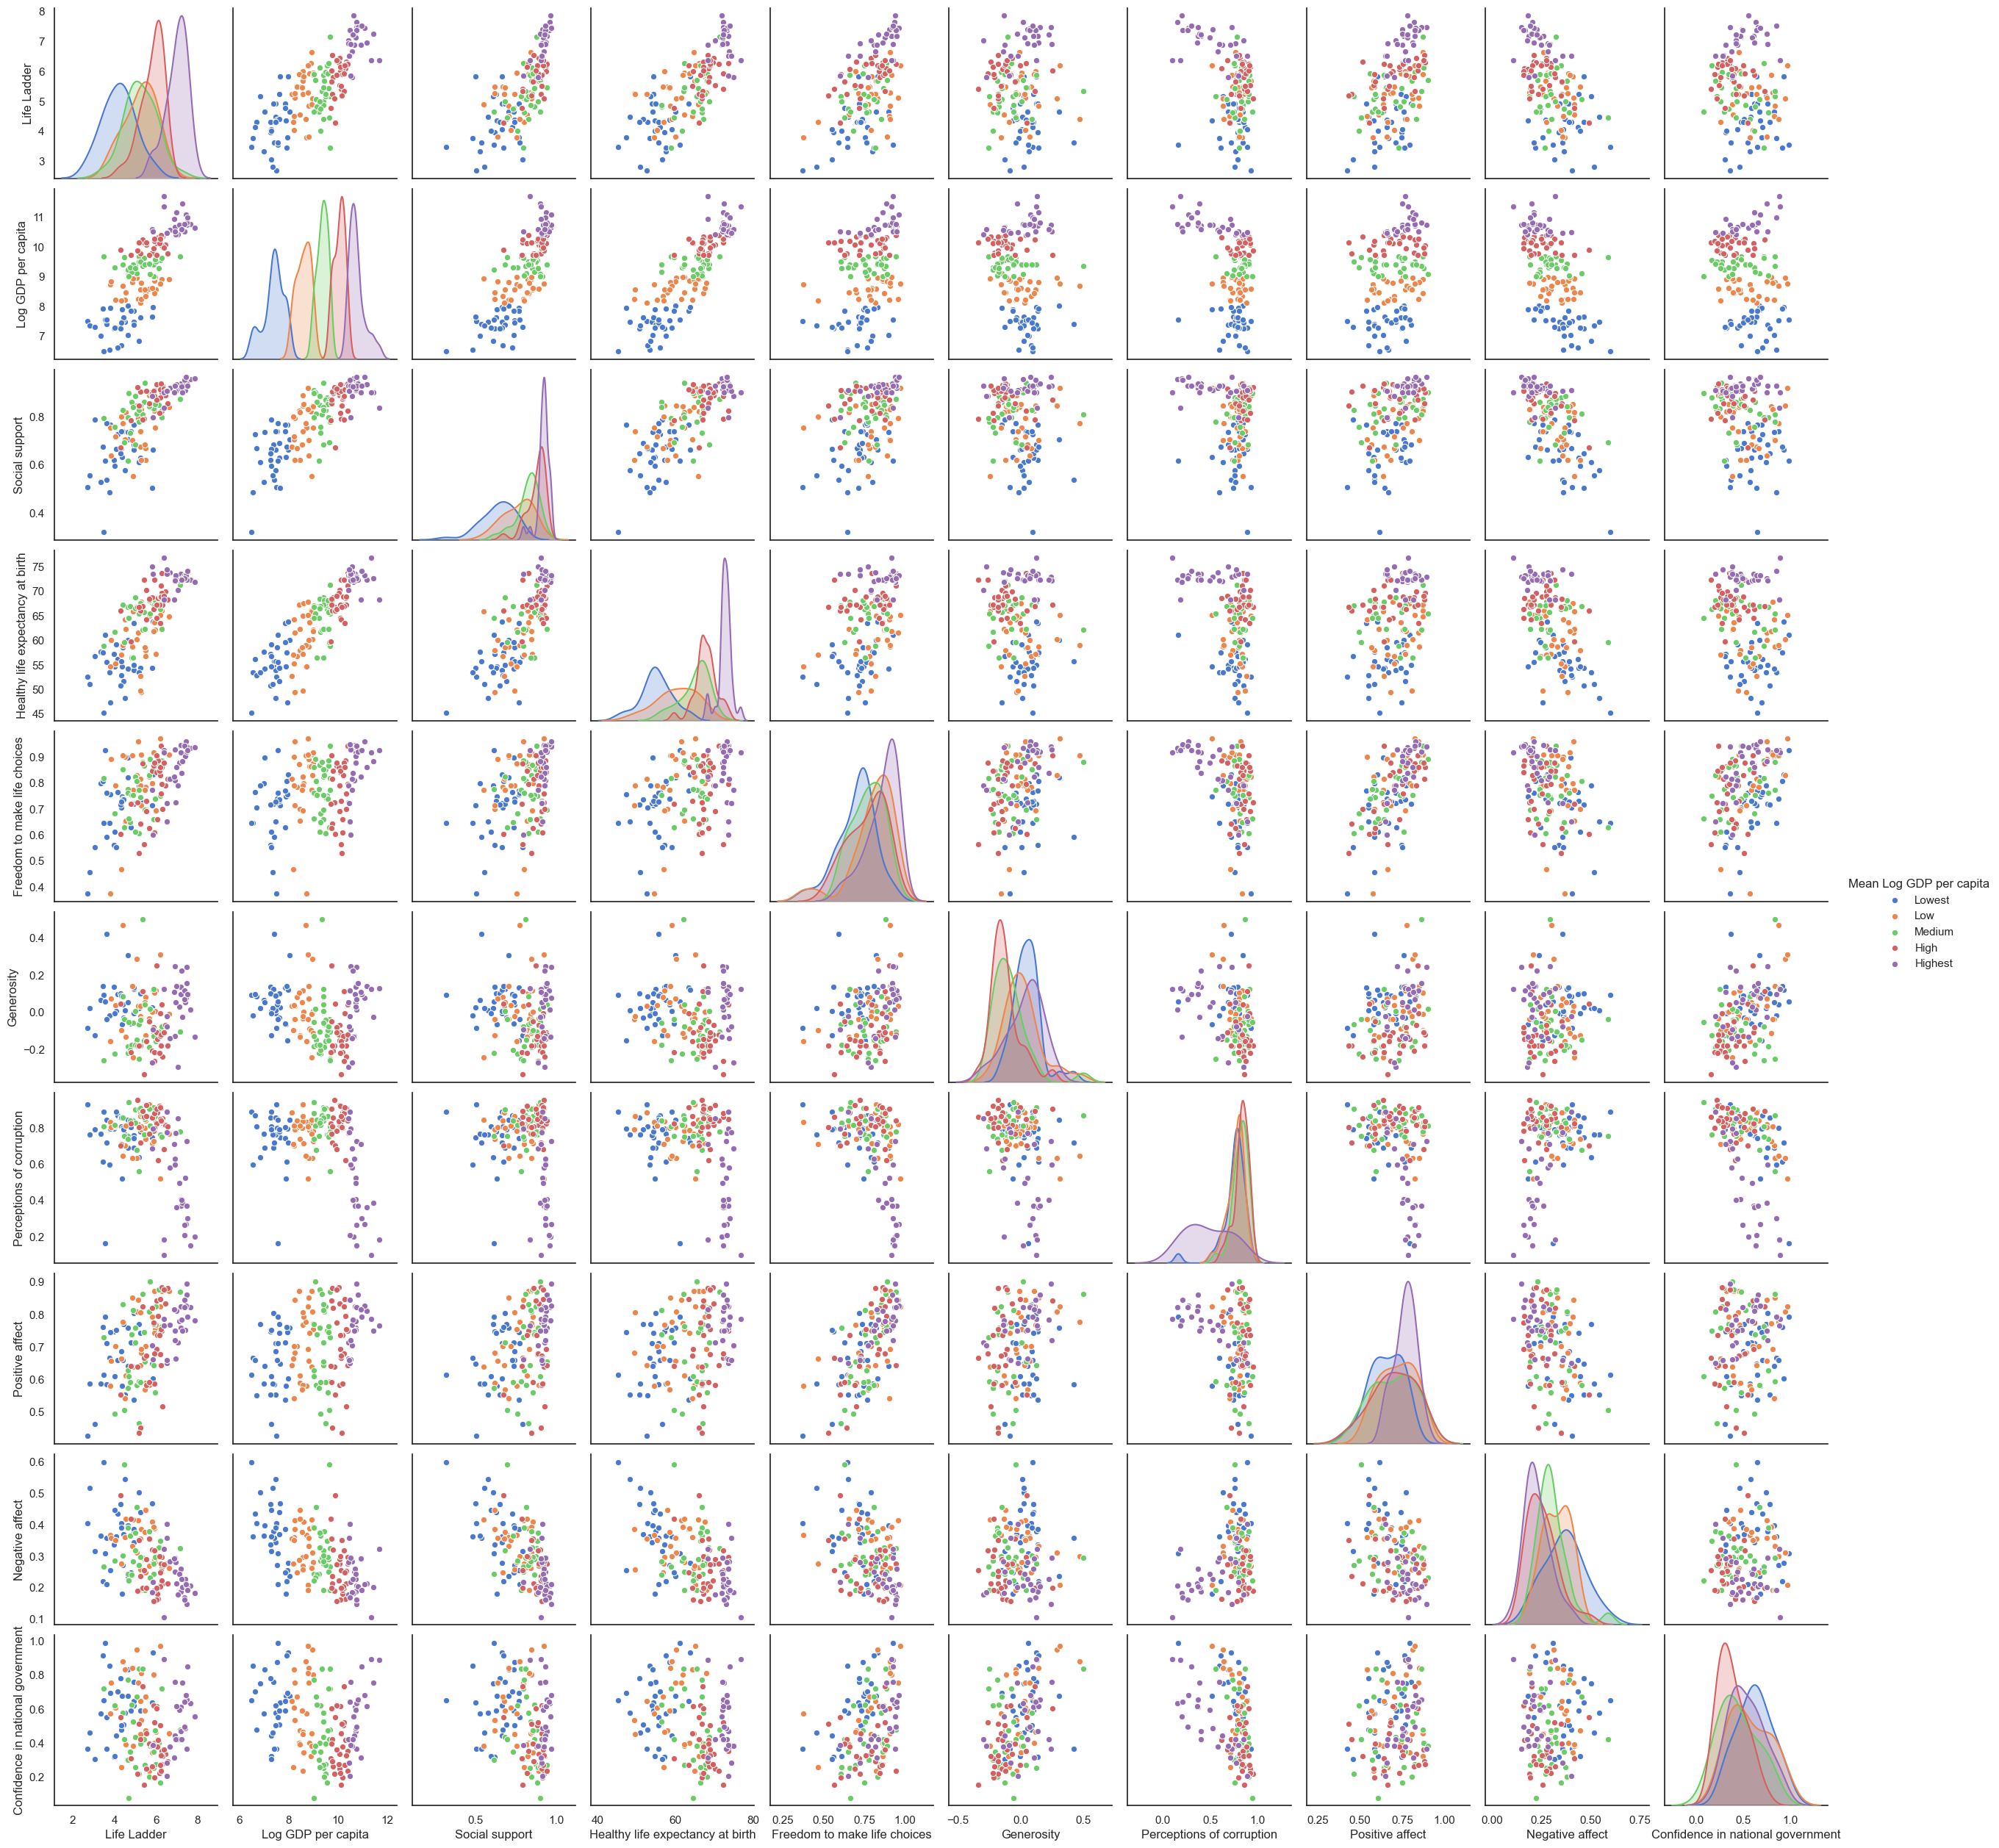

In [34]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)

g = sns.pairplot(
    data[data.Year == 2018][[
        'Life Ladder','Log GDP per capita', 
        'Social support','Healthy life expectancy at birth', 
        'Freedom to make life choices','Generosity', 
        'Perceptions of corruption', 'Positive affect','Negative affect', 
        'Confidence in national government',"Mean Log GDP per capita"]].dropna(), 
    hue="Mean Log GDP per capita"
)

g.fig.savefig('yolo.png')

# Facetgrid

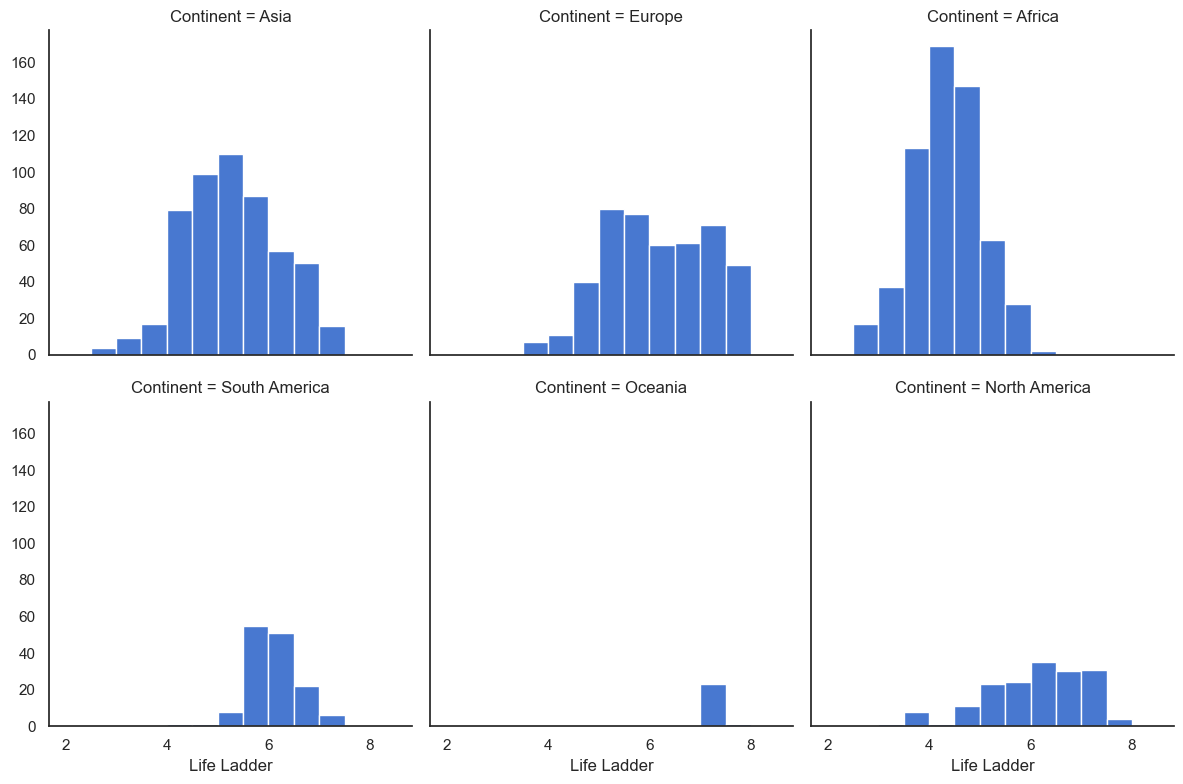

In [35]:
g = sns.FacetGrid(data, col="Continent", col_wrap=3,height=4)
g = (g.map(plt.hist, "Life Ladder",bins=np.arange(2,9,0.5)))

In [ ]:
g = sns.FacetGrid(
    data.groupby(['Mean Log GDP per capita','Year','Continent'])['Life Ladder'].mean().reset_index(),
    row='Mean Log GDP per capita',
    col='Continent',
    margin_titles=True
)
g = (g.map(plt.plot, 'Year','Life Ladder'))

In [ ]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="--", 
                color = kwargs.get("color", "r"))
    txkw = dict(size=15, color = kwargs.get("color", "r"))

    label_x_pos_adjustment = 0.08 # this needs customization base don your data
    label_y_pos_adjustment = 5 # this needs customization base don your data
    if x.mean() < 6: # this needs customization base don your data
        tx = "mean: {:.2f}\n(std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)
    else:
        tx = "mean: {:.2f}\n  (std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() -1.4, label_y_pos_adjustment, tx, **txkw)

_ = data.groupby(['Continent','Year'])['Life Ladder'].mean().reset_index()

g = sns.FacetGrid(_, col="Continent", height=4, aspect=0.9, col_wrap=3, margin_titles=True)
g.map(sns.kdeplot, "Life Ladder", shade=True, color='royalblue')
g.map(vertical_mean_line, "Life Ladder")

In [ ]:
def draw_heatmap(data,inner_row, inner_col, outer_row, outer_col, values, vmin,vmax):
    sns.set(font_scale=1)
    fg = sns.FacetGrid(
        data, 
        row=outer_row,
        col=outer_col, 
        margin_titles=True
    )

    position = left, bottom, width, height = 1.4, .2, .1, .6
    cbar_ax = fg.fig.add_axes(position) 

    fg.map_dataframe(
        draw_heatmap_facet, 
        x_col=inner_col,
        y_col=inner_row, 
        values=values, 
        cbar_ax=cbar_ax,
        vmin=vmin, 
        vmax=vmax
    )

    fg.fig.subplots_adjust(right=1.3)  
    plt.show()

def draw_heatmap_facet(*args, **kwargs):
    data = kwargs.pop('data')
    x_col = kwargs.pop('x_col')
    y_col = kwargs.pop('y_col')
    values = kwargs.pop('values')
    d = data.pivot(index=y_col, columns=x_col, values=values)
    annot = round(d,4).values
    cmap = sns.color_palette("Blues",30) + sns.color_palette("Blues",30)[0::2]
    #cmap = sns.color_palette("Blues",30)
    sns.heatmap(
        d, 
        **kwargs,
        annot=annot, 
        center=0, 
        cmap=cmap, 
        linewidth=.5
    )

# Data preparation
_ = data.copy()
_['Year'] = pd.cut(_['Year'],bins=[2006,2008,2012,2018])

_['GDP per Capita'] = _.groupby(['Continent','Year'])['Log GDP per capita'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
).fillna('Low')

_['Corruption'] = _.groupby(['Continent','GDP per Capita'])['Perceptions of corruption'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
)

_ = _[_['Continent'] != 'Oceania'].groupby(['Year','Continent','GDP per Capita','Corruption'])['Life Ladder'].mean().reset_index()
_['Life Ladder'] = _['Life Ladder'].fillna(-10)

draw_heatmap(
    data=_,
    outer_row='Corruption',
    outer_col='GDP per Capita',
    inner_row='Year',
    inner_col='Continent',
    values='Life Ladder',
    vmin=3,
    vmax=8,
)

# Plotly

In [ ]:
fig = px.scatter(
    data[data['Year'] == 2018], 
    x="Log GDP per capita", 
    y="Life Ladder", 
    size="Gapminder Population", 
    color="Continent",
    hover_name="Country name",
    size_max=60
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=data, 
    x="Log GDP per capita", 
    y="Life Ladder", 
    animation_frame="Year", 
    animation_group="Country name",
    size="Gapminder Population", 
    color="Continent", 
    hover_name="Country name", 
    facet_col="Continent",
    size_max=45,
    category_orders={'Year':list(range(2007,2019))}     
)

fig.show()

In [ ]:
def q_bin_in_3(col):
    return pd.qcut(
        col,
        q=3,
        labels=['Low','Medium','High']
    )

_ = data.copy()
_['Social support'] = _.groupby('Year')['Social support'].transform(q_bin_in_3)

_['Life Expectancy'] = _.groupby('Year')['Healthy life expectancy at birth'].transform(q_bin_in_3)

_['Generosity'] = _.groupby('Year')['Generosity'].transform(q_bin_in_3)

_['Perceptions of corruption'] = _.groupby('Year')['Perceptions of corruption'].transform(q_bin_in_3)

_ = _.groupby(['Social support','Life Expectancy','Generosity','Perceptions of corruption'])['Life Ladder'].mean().reset_index()

fig = px.parallel_categories(_, color="Life Ladder", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [ ]:
fig = px.bar(
    data_frame=data, 
    x="Continent", 
    y="Gapminder Population", 
    color="Mean Log GDP per capita", 
    barmode="stack", 
    facet_col="Year",
    category_orders={"Year": range(2007,2019)},
    hover_name='Country name',
    hover_data=[
        "Mean Log GDP per capita",
        "Gapminder Population",
        "Life Ladder"
    ]
)
fig.show()

In [ ]:
fig = px.choropleth(
    data_frame=data, 
    locations="ISO3", 
    color="Healthy life expectancy at birth", 
    hover_name="Country name", 
    animation_frame="Year")

fig.show()

In [ ]:
fig = px.choropleth(
    data_frame=data, 
    locations="ISO3", 
    color="Life Ladder", 
    hover_name="Country name", 
    animation_frame="Year")

fig.show()